In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [12]:
df = pd.read_csv('/content/retail_price.csv')

In [13]:
df.sample(5)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
506,furniture2,furniture_decor,01-08-2018,3,309.70,22.300000,103.233333,44,903,6,...,103.233333,4.1,22.300000,35.000000,3.7,15.628125,83.833333,4.4,23.776667,89.90
234,health1,health_beauty,01-03-2018,4,339.96,16.375000,84.990000,49,1495,3,...,23.990000,4.3,14.198750,83.740000,4.1,11.876875,58.990000,3.9,15.228000,84.99
105,perfumery1,perfumery,01-08-2018,4,199.96,12.280000,49.990000,54,1536,2,...,49.990000,4.3,12.280000,116.906667,4.4,17.790588,49.990000,4.3,12.280000,49.99
164,garden10,garden_tools,01-11-2017,87,4712.19,16.075862,53.648281,59,341,2,...,52.406944,4.1,17.067473,53.648281,4.2,16.075862,53.785714,4.1,18.275507,59.90
160,garden10,garden_tools,01-07-2017,19,1138.10,16.111579,59.900000,59,341,2,...,59.900000,4.1,16.626429,59.900000,4.2,16.111579,59.900000,4.1,15.392308,59.90


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [15]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [16]:
# Convert 'month_year' column to datetime
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Label Encoding for product_category_name
df['product_category_name'] = df['product_category_name'].astype('category').cat.codes
# Drop 'product_id' column
df = df.drop(columns=['product_id'])
# Drop unnecessary columns
columns_to_drop = [ 'product_name_lenght', 'product_description_lenght',
                   'product_photos_qty', 'comp_1', 'comp_2', 'comp_3', 'volume', 'weekday', 'weekend']



# Verify the column is removed
print(df.head())


   product_category_name month_year  qty  total_price  freight_price  \
0                      0 2017-05-01    1        45.95      15.100000   
1                      0 2017-06-01    3       137.85      12.933333   
2                      0 2017-07-01    6       275.70      14.840000   
3                      0 2017-08-01    4       183.80      14.287500   
4                      0 2017-09-01    2        91.90      15.100000   

   unit_price  product_name_lenght  product_description_lenght  \
0       45.95                   39                         161   
1       45.95                   39                         161   
2       45.95                   39                         161   
3       45.95                   39                         161   
4       45.95                   39                         161   

   product_photos_qty  product_weight_g  ...  comp_1  ps1        fp1  \
0                   2               350  ...    89.9  3.9  15.011897   
1                   2     

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_category_name       676 non-null    int8          
 1   month_year                  676 non-null    datetime64[ns]
 2   qty                         676 non-null    int64         
 3   total_price                 676 non-null    float64       
 4   freight_price               676 non-null    float64       
 5   unit_price                  676 non-null    float64       
 6   product_name_lenght         676 non-null    int64         
 7   product_description_lenght  676 non-null    int64         
 8   product_photos_qty          676 non-null    int64         
 9   product_weight_g            676 non-null    int64         
 10  product_score               676 non-null    float64       
 11  customers                   676 non-null    int64         

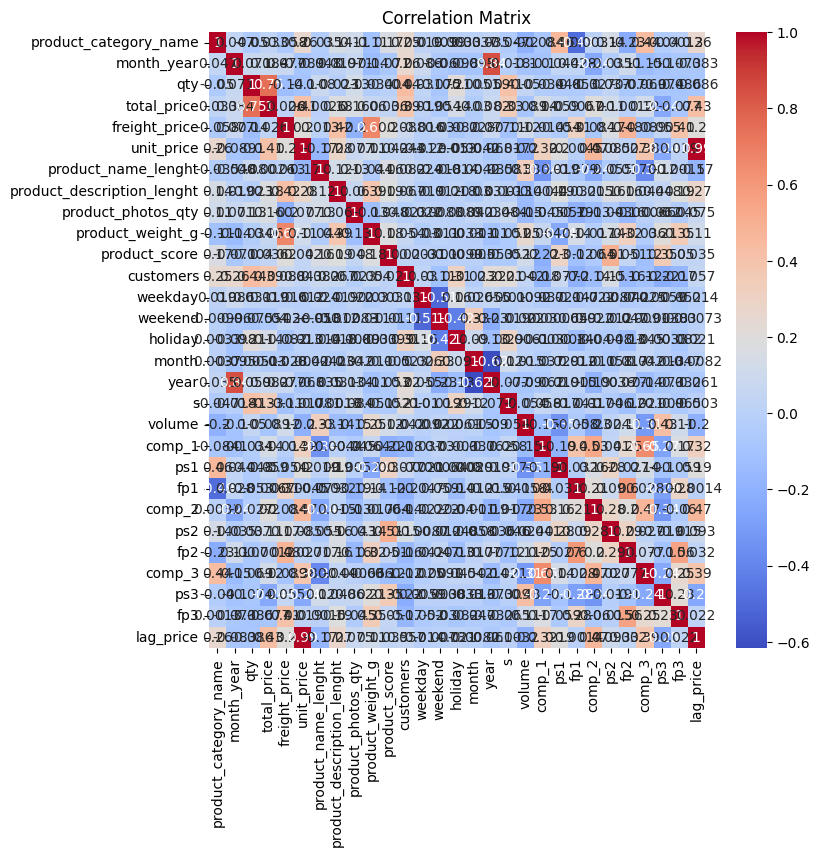

In [18]:
# Plotting the correlation matrix "Heatmap"

# Setting the figure size for the plot
plt.figure(figsize=(8,8))

# Creating a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# df.corr() calculates the correlation coefficients between numerical features
# annot=True adds the correlation values on the heatmap
# cmap='coolwarm' sets the color palette for the heatmap

# Adding a title to the heatmap
plt.title('Correlation Matrix')
# Displaying the heatmap
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Selection
X = df[['qty', 'freight_price', 'product_score', 'volume', 'comp_1', 'ps1', 'fp1', 'lag_price']]
y = df['unit_price']

#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         feature         VIF
0            qty    1.927431
1  freight_price    7.190837
2  product_score  388.291221
3         volume    2.675645
4         comp_1    5.377323
5            ps1  379.339424
6            fp1    7.336238
7      lag_price    3.925689


In [20]:
# Feature Selection
X = df[['qty', 'freight_price', 'product_score', 'volume', 'comp_1', 'ps1', 'fp1', 'lag_price']]
y = df['unit_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
print(X.columns)


Index(['qty', 'freight_price', 'product_score', 'volume', 'comp_1', 'ps1',
       'fp1', 'lag_price'],
      dtype='object')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_category_name       676 non-null    int8          
 1   month_year                  676 non-null    datetime64[ns]
 2   qty                         676 non-null    int64         
 3   total_price                 676 non-null    float64       
 4   freight_price               676 non-null    float64       
 5   unit_price                  676 non-null    float64       
 6   product_name_lenght         676 non-null    int64         
 7   product_description_lenght  676 non-null    int64         
 8   product_photos_qty          676 non-null    int64         
 9   product_weight_g            676 non-null    int64         
 10  product_score               676 non-null    float64       
 11  customers                   676 non-null    int64         

Mean Absolute Error: 4.663067737837636
Mean Squared Error: 57.69689614864497


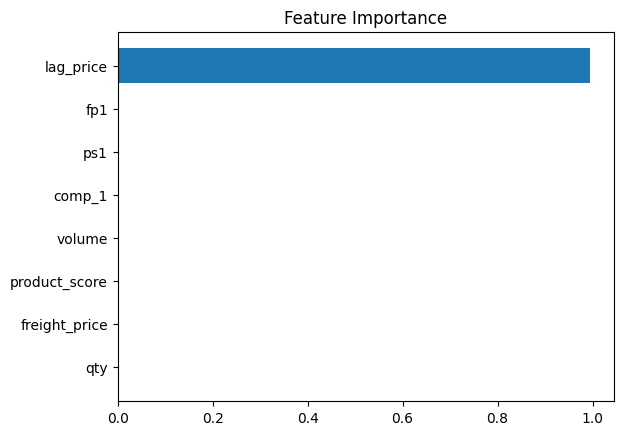

In [23]:
# Train Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Feature Importance
importance = dt_model.feature_importances_
features = X.columns
plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on x_train
X_test_scaled = scaler.transform(X_test)       # Transform on x_test

# Creating and training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on test data
y_pred_test = model.predict(X_test_scaled)

# Calculating R-squared
r2_test = r2_score(y_test, y_pred_test)

# Calculating MSE and RMSE
mse = mean_squared_error(y_test, y_pred_test)
rmse_test = mse ** 0.5

# Printing results
print("R-squared:", r2_test)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse_test)


R-squared: 0.9883702355791807
Mean Squared Error (MSE): 62.827407219644314
Root Mean Squared Error (RMSE): 7.926374153397272


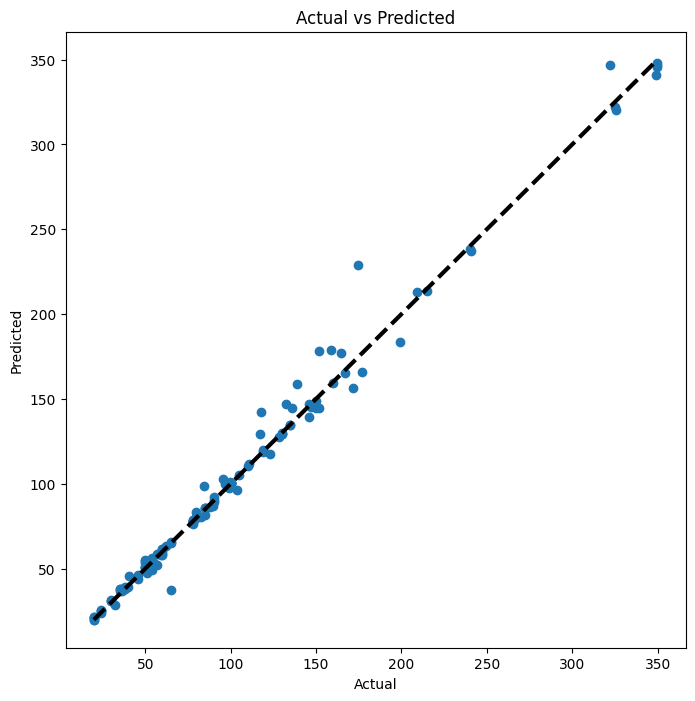

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred)*100)

# Calculate and print model score on the test set
score = model.score(X_test, y_test)
print("Model Score (R²):", score * 100, "%")


Mean Squared Error: 62.82740721961898
R2 Score: 98.83702355791854
Model Score (R²): 98.83702355791854 %
